<a href="https://colab.research.google.com/github/inuneko89/DADS_6003/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.ultimatepython.co/post/python-yahoo-finance

In [968]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance


In [1151]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib


--2024-02-19 16:54:12--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-19 16:54:12--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netix.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-19 16:54:12--  http://netix.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving netix.dl.sourceforg

In [1087]:
pip install scikit-learn

In [1244]:
import yfinance as yf

In [1245]:
tesla = yf.Ticker('AAPL')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
df = tesla.history(interval=interval,start=start,end=end)
df.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)
df

,Open,High,Low,Close
Datetime,,,,
2023-01-03 09:30:00-05:00,130.279999,130.899994,125.230003,125.459999
2023-01-03 10:30:00-05:00,125.459999,125.870003,124.730003,125.345001
2023-01-03 11:30:00-05:00,125.350197,125.370003,124.349098,124.660004
2023-01-03 12:30:00-05:00,124.660004,124.940002,124.190002,124.649902
2023-01-03 13:30:00-05:00,124.669899,125.000000,124.190002,124.570000
...,...,...,...,...
2023-12-29 11:30:00-05:00,191.964996,192.479996,191.725006,191.899994
2023-12-29 12:30:00-05:00,191.904999,192.229996,191.779999,191.899994
2023-12-29 13:30:00-05:00,191.904999,192.449997,191.899994,192.119995


In [1246]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [1247]:
X

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-05 13:30:00-05:00,126.489998,127.040001,125.809998,125.888702,126.546190,-0.366617,48.480916,0.009995,-0.010002
2023-01-05 14:30:00-05:00,125.889999,126.379997,125.029999,125.160004,126.255690,0.031498,40.969322,0.001297,-0.599998
2023-01-05 15:30:00-05:00,125.169998,125.300003,124.760002,125.019997,126.031680,0.515507,39.657585,0.009995,-0.720001
2023-01-06 09:30:00-05:00,126.010002,127.349998,124.889999,126.375000,126.096680,0.437123,55.112365,0.990005,0.840004
2023-01-06 10:30:00-05:00,126.375000,128.039993,126.340103,127.245003,126.238180,0.281607,62.047006,0.000000,0.364998
...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,191.964996,192.479996,191.725006,191.899994,193.479910,-0.520149,31.683003,0.004990,-1.544998
2023-12-29 12:30:00-05:00,191.904999,192.229996,191.779999,191.899994,193.245000,-0.264303,31.683003,0.005005,-0.059998
2023-12-29 13:30:00-05:00,191.904999,192.449997,191.899994,192.119995,193.051999,0.092220,35.924842,0.005005,0.000000


In [1248]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [1249]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [1250]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# ตรวจสอบและลบข้อมูลที่ไม่เหมาะสม
valid_indices = np.isfinite(X_train).all(axis=1) & np.isfinite(y_train)

X_train = X_train[valid_indices]
y_train = y_train[valid_indices]

# แบ่งข้อมูลเป็นชุด train และ test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# สร้างและฝึกโมเดล Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1251]:
probability = model.predict_proba(X_test)
probability

array([[0.52051012, 0.47948988],
       [0.38384889, 0.61615111],
       [0.4671422 , 0.5328578 ],
       [0.50443215, 0.49556785],
       [0.45644924, 0.54355076],
       [0.44918797, 0.55081203],
       [0.51393502, 0.48606498],
       [0.47225318, 0.52774682],
       [0.4269244 , 0.5730756 ],
       [0.48318314, 0.51681686],
       [0.44103318, 0.55896682],
       [0.45632036, 0.54367964],
       [0.45948937, 0.54051063],
       [0.61085815, 0.38914185],
       [0.57233679, 0.42766321],
       [0.51506051, 0.48493949],
       [0.51076914, 0.48923086],
       [0.4286314 , 0.5713686 ],
       [0.41742548, 0.58257452],
       [0.51952393, 0.48047607],
       [0.45174163, 0.54825837],
       [0.43368347, 0.56631653],
       [0.49376393, 0.50623607],
       [0.52803524, 0.47196476],
       [0.49822691, 0.50177309],
       [0.42913245, 0.57086755],
       [0.42080391, 0.57919609],
       [0.38941908, 0.61058092],
       [0.48384231, 0.51615769],
       [0.4173426 , 0.5826574 ],
       [0.

In [1252]:
probability = model.predict_proba(X_test)
print(probability)

predicted = model.predict(X_test)

[[0.52051012 0.47948988]
 [0.38384889 0.61615111]
 [0.4671422  0.5328578 ]
 [0.50443215 0.49556785]
 [0.45644924 0.54355076]
 [0.44918797 0.55081203]
 [0.51393502 0.48606498]
 [0.47225318 0.52774682]
 [0.4269244  0.5730756 ]
 [0.48318314 0.51681686]
 [0.44103318 0.55896682]
 [0.45632036 0.54367964]
 [0.45948937 0.54051063]
 [0.61085815 0.38914185]
 [0.57233679 0.42766321]
 [0.51506051 0.48493949]
 [0.51076914 0.48923086]
 [0.4286314  0.5713686 ]
 [0.41742548 0.58257452]
 [0.51952393 0.48047607]
 [0.45174163 0.54825837]
 [0.43368347 0.56631653]
 [0.49376393 0.50623607]
 [0.52803524 0.47196476]
 [0.49822691 0.50177309]
 [0.42913245 0.57086755]
 [0.42080391 0.57919609]
 [0.38941908 0.61058092]
 [0.48384231 0.51615769]
 [0.4173426  0.5826574 ]
 [0.39720925 0.60279075]
 [0.4160734  0.5839266 ]
 [0.45812407 0.54187593]
 [0.44399394 0.55600606]
 [0.50760655 0.49239345]
 [0.447042   0.552958  ]
 [0.46022122 0.53977878]
 [0.44357066 0.55642934]
 [0.43011443 0.56988557]
 [0.41070274 0.58929726]


In [1253]:
predicted

array([-1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,
        1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1

In [1254]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 39 132]
 [ 37 154]]


In [1255]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.51      0.23      0.32       171
           1       0.54      0.81      0.65       191

    accuracy                           0.53       362
   macro avg       0.53      0.52      0.48       362
weighted avg       0.53      0.53      0.49       362



In [1256]:
print(model.score(X_test,y_test))
0.528


0.5331491712707183


0.528

In [1257]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# สร้าง SimpleImputer
imputer = SimpleImputer(strategy='mean')

# แทนที่ค่าที่หายไปใน X ด้วยค่าเฉลี่ยของแต่ละคอลัมน์
X_imputed = imputer.fit_transform(X)

# ใช้ cross-validation เพื่อประเมินโมเดล
cross_val = cross_val_score(LogisticRegression(), X_imputed, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.50867052 0.53757225 0.56647399 0.49132948 0.51162791 0.5
 0.51744186 0.52906977 0.59302326 0.55232558]
0.530753461486759


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

#A. Apple Stock Prediction


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-1258-9cd579282836>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Signal'] = predicted_signal
<ipython-input-1258-9cd579282836>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nifty_returns'] = np.log(df['Close'] / df['Close'].shift(1))
<ipython-input-1258-9cd579282836>:13: SettingWithCopyWarni

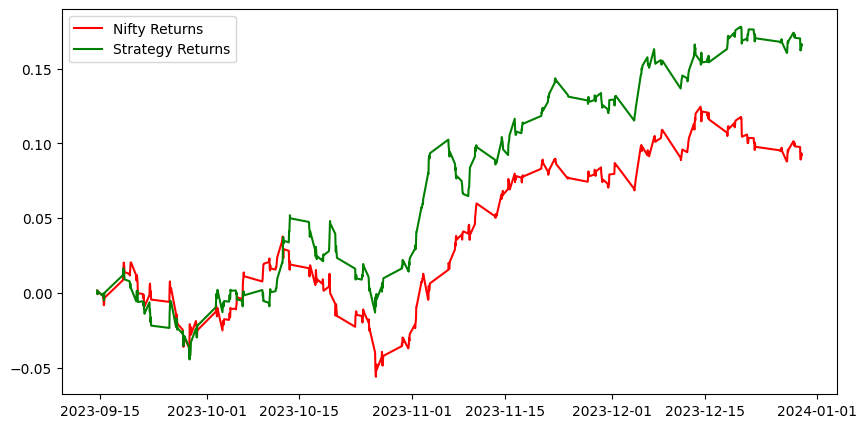

In [1258]:
from sklearn.impute import SimpleImputer

predicted_signal = model.predict(X_imputed)

# เพิ่มคอลัมน์ Predicted_Signal ใน DataFrame
df['Predicted_Signal'] = predicted_signal

# คำนวณผลตอบแทนของ Nifty
df['Nifty_returns'] = np.log(df['Close'] / df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['Nifty_returns'])  # ต้องกำหนด split ตามที่เหมาะสม

# คำนวณผลตอบแทนของกลยุทธ์
df['Strategy_returns'] = df['Nifty_returns'] * df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])  # ต้องกำหนด split ตามที่เหมาะสม

# พล็อตกราฟ
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')  # ปรับชื่อรายการให้เป็น 'Nifty Returns'
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')  # ปรับชื่อรายการให้เป็น 'Strategy Returns'
plt.legend()
plt.show()


In [1354]:
#Micro = yf.Ticker('MSFT')
Micro = yf.Ticker('META')
interval = '1h'
start = '2023-1-1'
end = '2023-12-31'
Micro_price_df = Micro.history(interval='1h',start=start,end=end)
df2 = Micro_price_df["Close"]
df2 = pd.DataFrame(df2)
df2


,Close
Datetime,
2023-01-03 09:30:00-05:00,123.099998
2023-01-03 10:30:00-05:00,124.629997
2023-01-03 11:30:00-05:00,123.930000
2023-01-03 12:30:00-05:00,124.529999
2023-01-03 13:30:00-05:00,124.730003
...,...
2023-12-29 11:30:00-05:00,352.149994
2023-12-29 12:30:00-05:00,353.519989
2023-12-29 13:30:00-05:00,353.295013


In [1355]:

merged_df = pd.merge(df.iloc[:,:9], df2,on='Datetime', how='inner')
merged_df.head()

,Open,High,Low,Close_x,S_10,Corr,RSI,Open-Close,Open-Open,Close_y
Datetime,,,,,,,,,,
2023-01-05 13:30:00-05:00,126.489998,127.040001,125.809998,125.888702,126.54619,-0.366617,48.480916,0.009995,-0.010002,127.455002
2023-01-05 14:30:00-05:00,125.889999,126.379997,125.029999,125.160004,126.25569,0.031498,40.969322,0.001297,-0.599998,127.665001
2023-01-05 15:30:00-05:00,125.169998,125.300003,124.760002,125.019997,126.03168,0.515507,39.657585,0.009995,-0.720001,126.949997
2023-01-06 09:30:00-05:00,126.010002,127.349998,124.889999,126.375000,126.09668,0.437123,55.112365,0.990005,0.840004,128.080002
2023-01-06 10:30:00-05:00,126.375000,128.039993,126.340103,127.245003,126.23818,0.281607,62.047006,0.000000,0.364998,128.750000


In [1356]:
merged_df.rename(columns={'Close_x': 'Close_APPL'}, inplace=True)
merged_df.rename(columns={'Close_y': 'Close_Micro'}, inplace=True)

Xb_df = merged_df.iloc[:,:10]

Xb = Xb_df.copy()

Xb.head()

,Open,High,Low,Close_APPL,S_10,Corr,RSI,Open-Close,Open-Open,Close_Micro
Datetime,,,,,,,,,,
2023-01-05 13:30:00-05:00,126.489998,127.040001,125.809998,125.888702,126.54619,-0.366617,48.480916,0.009995,-0.010002,127.455002
2023-01-05 14:30:00-05:00,125.889999,126.379997,125.029999,125.160004,126.25569,0.031498,40.969322,0.001297,-0.599998,127.665001
2023-01-05 15:30:00-05:00,125.169998,125.300003,124.760002,125.019997,126.03168,0.515507,39.657585,0.009995,-0.720001,126.949997
2023-01-06 09:30:00-05:00,126.010002,127.349998,124.889999,126.375000,126.09668,0.437123,55.112365,0.990005,0.840004,128.080002
2023-01-06 10:30:00-05:00,126.375000,128.039993,126.340103,127.245003,126.23818,0.281607,62.047006,0.000000,0.364998,128.750000


In [1357]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scalerb = StandardScaler()
Xb = scalerb.fit_transform(Xb)  # Assuming X is your feature matrix
Xb

array([[-2.75930279e+00, -2.76879290e+00, -2.76788944e+00, ...,
         3.10458786e-02, -5.86045524e-02, -2.18663494e+00],
       [-2.79502221e+00, -2.80823958e+00, -2.81427146e+00, ...,
         1.29858293e-02, -7.73190690e-01, -2.18323757e+00],
       [-2.83788570e+00, -2.87278798e+00, -2.83032660e+00, ...,
         3.10458786e-02, -9.18534472e-01, -2.19480493e+00],
       ...,
       [ 1.13501703e+00,  1.14058987e+00,  1.16210066e+00, ...,
         2.06851135e-02, -4.64902605e-02,  1.46701346e+00],
       [ 1.14751926e+00,  1.15732466e+00,  1.17458855e+00, ...,
        -6.81010223e-05,  2.07863668e-01,  1.49273649e+00],
       [ 1.18085732e+00,  1.18123215e+00,  1.16923699e+00, ...,
        -6.81010223e-05,  6.31762242e-01,  1.47833780e+00]])

In [1358]:
yb = np.where(merged_df['Close_APPL'].shift(-1) > merged_df['Close_APPL'],1,-1)
yb

array([-1, -1,  1, ...,  1, -1, -1])

In [1359]:
merged_df

,Open,High,Low,Close_APPL,S_10,Corr,RSI,Open-Close,Open-Open,Close_Micro
Datetime,,,,,,,,,,
2023-01-05 13:30:00-05:00,126.489998,127.040001,125.809998,125.888702,126.546190,-0.366617,48.480916,0.009995,-0.010002,127.455002
2023-01-05 14:30:00-05:00,125.889999,126.379997,125.029999,125.160004,126.255690,0.031498,40.969322,0.001297,-0.599998,127.665001
2023-01-05 15:30:00-05:00,125.169998,125.300003,124.760002,125.019997,126.031680,0.515507,39.657585,0.009995,-0.720001,126.949997
2023-01-06 09:30:00-05:00,126.010002,127.349998,124.889999,126.375000,126.096680,0.437123,55.112365,0.990005,0.840004,128.080002
2023-01-06 10:30:00-05:00,126.375000,128.039993,126.340103,127.245003,126.238180,0.281607,62.047006,0.000000,0.364998,128.750000
...,...,...,...,...,...,...,...,...,...,...
2023-12-29 11:30:00-05:00,191.964996,192.479996,191.725006,191.899994,193.479910,-0.520149,31.683003,0.004990,-1.544998,352.149994
2023-12-29 12:30:00-05:00,191.904999,192.229996,191.779999,191.899994,193.245000,-0.264303,31.683003,0.005005,-0.059998,353.519989
2023-12-29 13:30:00-05:00,191.904999,192.449997,191.899994,192.119995,193.051999,0.092220,35.924842,0.005005,0.000000,353.295013


In [1360]:
splitb = int(0.7*len(merged_df))
Xb_train, Xb_test, yb_train, yb_test = Xb[:splitb], Xb[splitb:], yb[:splitb], yb[splitb:]

In [1361]:

modelb = LogisticRegression(max_iter=1000)
modelb = modelb.fit(Xb_train, yb_train)


In [1362]:
pd.DataFrame(zip(Xb_df.columns, np.transpose(modelb.coef_)))

,0,1
0,Open,[-0.4236884082599023]
1,High,[-0.33198622221884416]
2,Low,[0.5349182261435387]
3,Close_APPL,[0.1396614515176713]
4,S_10,[-0.3221940202497289]
5,Corr,[0.04660572123561966]
6,RSI,[-0.00112120427437639]
7,Open-Close,[-0.06319123228981498]
8,Open-Open,[-0.005073113117439562]
9,Close_Micro,[0.37663702634559826]


In [1363]:
# Specify the date for prediction
predictionb_date = '2023-12-31'
probabilityb = modelb.predict_proba(Xb_test)
probabilityb

array([[0.40813123, 0.59186877],
       [0.41028997, 0.58971003],
       [0.41228468, 0.58771532],
       ...,
       [0.44420277, 0.55579723],
       [0.43509508, 0.56490492],
       [0.44129135, 0.55870865]])

In [1364]:
predictedb = modelb.predict(Xb_test)
predictedb

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [1365]:

print(metrics.confusion_matrix(yb_test, predictedb))

[[ 15 227]
 [ 13 263]]


In [1366]:
print(metrics.classification_report(yb_test, predictedb))

              precision    recall  f1-score   support

          -1       0.54      0.06      0.11       242
           1       0.54      0.95      0.69       276

    accuracy                           0.54       518
   macro avg       0.54      0.51      0.40       518
weighted avg       0.54      0.54      0.42       518



In [1367]:
print(modelb.score(Xb_test,yb_test))

0.5366795366795367


In [1368]:
cross_val = cross_val_score(LogisticRegression(), Xb, yb, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.53179191 0.52601156 0.56647399 0.49710983 0.52325581 0.54069767
 0.5        0.52906977 0.54651163 0.48837209]
0.5249294259981181


#B.Apple Stock มีผลกระทบจากค่าของของ Faceook Stock(Meta)

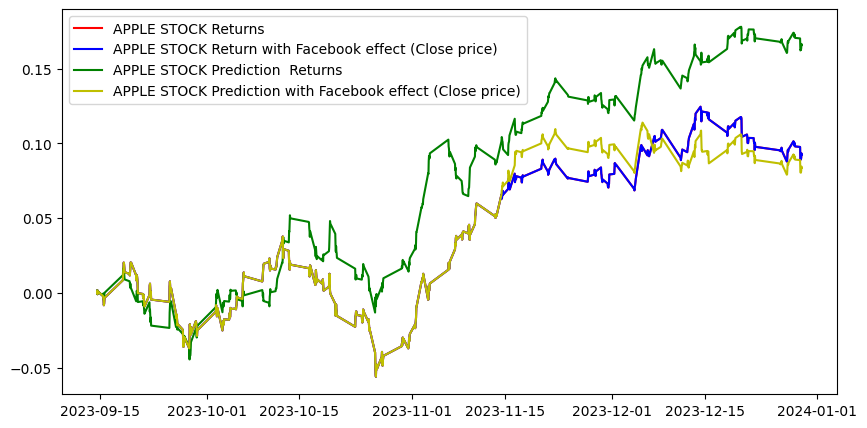

In [1370]:
plt.figure(figsize=(10,5))

##เส้นที่ 1 ผลตอบแทนจริงของ BH กรณีปกติ
plt.plot(Cumulative_Nifty_returns, color='r',label = 'APPLE STOCK Returns')


##เส้นที่ 2 ผลตอบแทนจริงของ BH กรณีที่เอาราคาปิดของ Apple มาวิเคราะห์ร่วม/
merged_df['Predicted_Signalb'] = modelb.predict(Xb)
merged_df['APPL_Micro'] = np.log(merged_df['Close_APPL']/merged_df['Close_APPL'].shift(1))
Cumulative_APPL_Micro_returns = np.cumsum(merged_df[splitb:]['APPL_Micro'])
plt.plot(Cumulative_APPL_Micro_returns, color='b',label = 'APPLE STOCK Return with Facebook effect (Close price)')

##เส้นที่ 3 ผลตอบแทนของตาม model กรณีปกติ
plt.plot(Cumulative_Strategy_returns, color='g', label = 'APPLE STOCK Prediction  Returns')


##เส้นที่ 4 ผลตอบแทนของตาม model กรณีที่เอาราคาปิดของ Apple มาวิเคราะห์ร่วม
merged_df['Strategy_returnsb'] = merged_df['APPL_Micro']* merged_df['Predicted_Signalb'].shift(1)
Cumulative_Strategy_returnsb = np.cumsum(merged_df[splitb:]['Strategy_returnsb'])
plt.plot(Cumulative_Strategy_returnsb, color='y', label = 'APPLE STOCK Prediction with Facebook effect (Close price)')


plt.legend()
plt.show()